In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

# Import loaders (used by viewer and overlays)
from loader import (
    load_cgm_data,
    load_sleep_data,
    load_food_entry_data
)

# Import the CGMViewer class
from viewer import CGMViewer

# Import overlays on CGM (glucose) time-series
from overlays import (
    TimeInRangeOverlay,
    FoodEntryOverlay
)

# Import CGM-based biomarker overlays
from overlays import (
    CgmMeasuresOverlay,
    CvOverlay,
    MageOverlay
)

# Import Multi-modal biomarker overlays
from overlays import (
    WakeupGlucoseOverlay,
    PPGROverlay
)

# Import extensions (e.g. hypnogram) that will be attached in separate panel
from extensions import (
    HypnogramExtension
)

In [6]:
# Local path to data if JHE client fails
base_path = "./sample_subject"

## Loading Data from the JupyterHealth Exchange

In [2]:
# Initialize the JupyterHealth Client
# See documentation for more detail: https://jupyterhealth.org/software-documentation/
from jupyterhealth_client import JupyterHealthClient, Code
jh_client = JupyterHealthClient()

# Sample study and patient for the purpose of this tutorial
patient_id = 40079
study_id = 30017

# Get basic information about the patient
jh_client.get_patient(patient_id)

{'id': 40079,
 'jheUserId': 10070,
 'identifier': '010101',
 'nameFamily': 'Doe',
 'nameGiven': 'Jane',
 'birthDate': '1998-01-01',
 'telecomPhone': None,
 'telecomEmail': 'janedoejupyter@example.org',
 'organizations': [{'id': 20029,
   'name': 'JupyterCon Tutorial',
   'type': 'other',
   'partOf': 20028,
   'currentUserRole': None,
   'children': []}]}

### Loading CGM Data from JHE

In [3]:
# Using the client
client_cgm_df = jh_client.list_observations_df(
    patient_id = patient_id,
    study_id = study_id,
    code = Code.BLOOD_GLUCOSE.value,
    limit = 10_000
)

cgm_df = load_cgm_data(source="client", client_df=client_cgm_df)
cgm_df.head()

,time,gl
0,2025-01-28 10:21:00+00:00,84.0
1,2025-01-28 10:26:00+00:00,83.0
2,2025-01-28 10:31:00+00:00,81.0
3,2025-01-28 10:36:00+00:00,82.0
4,2025-01-28 10:41:00+00:00,82.0


In [4]:
# You can also load using the local file
cgm_df = load_cgm_data(source="file", base_path=base_path, filename="blood_glucose.json")
cgm_df.head()

,time,gl
0,2025-01-28 10:21:00+00:00,84.0
1,2025-01-28 10:26:00+00:00,83.0
2,2025-01-28 10:31:00+00:00,81.0
3,2025-01-28 10:36:00+00:00,82.0
4,2025-01-28 10:41:00+00:00,82.0


### Loading Sleep Data

In [16]:
client_sleep_df = jh_client.list_observations_df(
    patient_id = patient_id,
    study_id = study_id,
    code = Code.SLEEP_STAGE_SUMMARY.value
)

sleep_df = load_sleep_data(source="client", client_df=client_sleep_df)
sleep_df.head()

,start,end,stage
0,2025-01-28 20:37:30+00:00,2025-01-28 20:41:30+00:00,Light_sleep
1,2025-01-28 20:41:30+00:00,2025-01-28 20:55:00+00:00,Awake
2,2025-01-28 20:55:00+00:00,2025-01-28 21:00:30+00:00,Light_sleep
3,2025-01-28 21:00:30+00:00,2025-01-28 21:07:00+00:00,Awake
4,2025-01-28 21:07:00+00:00,2025-01-28 21:26:00+00:00,Light_sleep


In [15]:
sleep_df = load_sleep_data(source="file", base_path=base_path, filename="sleep_stage_summary.json")
sleep_df.head()

,start,end,stage
0,2025-01-28 20:37:30+00:00,2025-01-28 20:41:30+00:00,Light_sleep
1,2025-01-28 20:41:30+00:00,2025-01-28 20:55:00+00:00,Awake
2,2025-01-28 20:55:00+00:00,2025-01-28 21:00:30+00:00,Light_sleep
3,2025-01-28 21:00:30+00:00,2025-01-28 21:07:00+00:00,Awake
4,2025-01-28 21:07:00+00:00,2025-01-28 21:26:00+00:00,Light_sleep


### Loading Food Entry Data

In [18]:
client_food_df = jh_client.list_observations_df(
    patient_id = patient_id,
    study_id = study_id,
    code = Code.FOOD_ENTRY.value
)

food_df = load_food_entry_data(source="client", client_df=client_food_df)
food_df.head()

,time,carbohydrate,food_name,calories
0,2025-01-28 09:00:00+00:00,6.0,"Soy Milk, Vanilla or Other Flavors, Unsweetene...",147.67
1,2025-01-28 12:30:00+00:00,0.0,"Chicken Thigh, Skin Removed",173.00
2,2025-01-28 19:00:00+00:00,28.0,"Pistachio Nuts, Raw",560.00
3,2025-01-29 10:15:00+00:00,6.0,"Soy Milk, Vanilla or Other Flavors, Unsweetene...",147.67
4,2025-01-29 10:15:00+00:00,92.0,"Pumpkin Pie, single crust - 1/8 of 9"" pie",635.43


In [19]:
food_df = load_food_entry_data(source="file", base_path=base_path, filename="food_entry.json")
food_df.head()

,time,carbohydrate,food_name,calories
0,2025-01-28 09:00:00+00:00,6.0,"Soy Milk, Vanilla or Other Flavors, Unsweetene...",147.67
1,2025-01-28 12:30:00+00:00,0.0,"Chicken Thigh, Skin Removed",173.00
2,2025-01-28 19:00:00+00:00,28.0,"Pistachio Nuts, Raw",560.00
3,2025-01-29 10:15:00+00:00,6.0,"Soy Milk, Vanilla or Other Flavors, Unsweetene...",147.67
4,2025-01-29 10:15:00+00:00,92.0,"Pumpkin Pie, single crust - 1/8 of 9"" pie",635.43


## Using the CGMSandbox

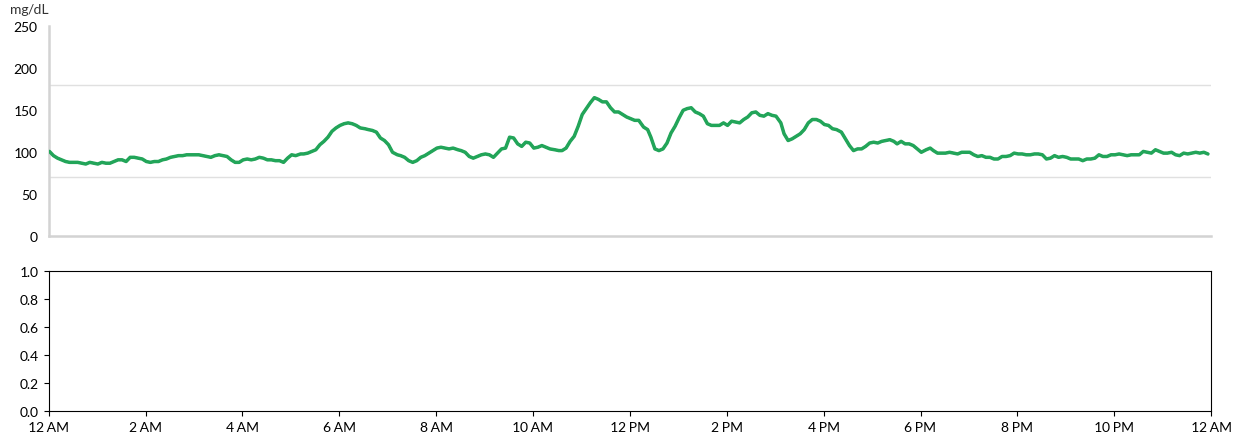

In [8]:
### Initialize the CGMSandbox Viewer and draw daily glucose tracings
viewer = CGMViewer(source="file", 
                   base_path=base_path, 
                   filename="blood_glucose.json", 
                   gl_range=(0, 250))

### Let's try to add some overlay's to the plain CGM tracing! 
viewer.add_overlay(TimeInRangeOverlay())
viewer.add_overlay(FoodEntryOverlay(base_path, filename="food_entry.json"))

# ### Now, let us extend the plain CGM tracing by adding an hypnogram extension
viewer.add_extensions(HypnogramExtension(base_path, filename="sleep_stage_summary.json"))

# ### Let us use overlay to visualize our CGM-based biomarkers
viewer.add_overlay(CgmMeasuresOverlay())
viewer.add_overlay(CvOverlay())
viewer.add_overlay(MageOverlay(show_ma=True))

# ### We can utilize sleep and diet data to extract other meaninful markers
viewer.add_overlay(WakeupGlucoseOverlay(base_path, filename="sleep_stage_summary.json"))
viewer.add_overlay(PPGROverlay(base_path, filename="food_entry.json"))

viewer.show()